In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from PIL import Image
from keras.utils.vis_utils import plot_model
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt

Using TensorFlow backend.
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py

In [ ]:
import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'CNN.ipynb', 'test_set', 'training_set']


In [ ]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a second convolutional layer
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a third convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Adding a fourth convolutional layer
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))

# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 64, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('./training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('./test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 113 images belonging to 2 classes.
Found 46 images belonging to 2 classes.


In [ ]:
filepath = "best_model.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = classifier.fit_generator(training_set,
                         steps_per_epoch = 200,
                         epochs = 5,
                         validation_data = test_set,
                         validation_steps = 800,
                         callbacks = [checkpoint])
print(history.history.keys())

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
200/200 [==============================] - 1173s 6s/step - loss: 0.6568 - accuracy: 0.6051 - val_loss: 0.6784 - val_accuracy: 0.4565
Epoch 2/5


C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks\callbacks.py:707: RuntimeWarning: Can save best model only with val_acc available, skipping.
  'skipping.' % (self.monitor), RuntimeWarning)


200/200 [==============================] - 1166s 6s/step - loss: 0.5763 - accuracy: 0.6912 - val_loss: 1.4791 - val_accuracy: 0.5435
Epoch 3/5
200/200 [==============================] - 982s 5s/step - loss: 0.4917 - accuracy: 0.7423 - val_loss: 1.2185 - val_accuracy: 0.5652
Epoch 4/5
200/200 [==============================] - 690s 3s/step - loss: 0.4117 - accuracy: 0.7912 - val_loss: 2.2879 - val_accuracy: 0.5217
Epoch 5/5
200/200 [==============================] - 724s 4s/step - loss: 0.3327 - accuracy: 0.8481 - val_loss: 1.3710 - val_accuracy: 0.5652
dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


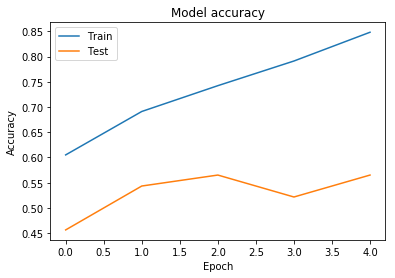

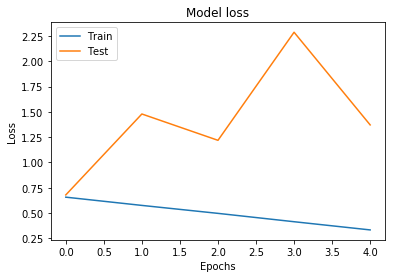

In [ ]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\Hi\Desktop\BTP\test_set\healthy\N-7-L-Disc-Avg.png', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
print(result)
#print(training_set.class_indices)
if result[0][0] == 1:
    prediction = 'normal'
else:
    prediction = 'glaucoma'
print(prediction)

[[0.]]
glaucoma
